# Basic preparations

In this Notebook, the geofabric for COMID baisn 71037856 at outlet station 05BL027 is extracted from the `MERIT-Basins` dataset. The only relevant set from MB is 71.

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import hydrant.topology.geom as gm

import subprocess
import os

Path definitions (system dependant - modify accordingly):

In [2]:
# geofabric paths

# merit-basins
mb_path = '/work/comphyd_lab/data/geospatial-data/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/pfaf_level_02/'
nc_path = '/work/comphyd_lab/data/geospatial-data/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/coastal_hillslopes'

# output paths
shapefile = mb_path + 'cat_pfaf_71_MERIT_Hydro_v07_Basins_v01_bugfix1.shp'


# Reading Geofabric Dataset

## Basin boundaries

In [3]:
divisions = gpd.read_file(shapefile)

In [4]:
#division of interest
COMID_05BL027 = divisions.loc[divisions.COMID == 71037856].copy().set_crs(epsg=4326)


<Axes: >

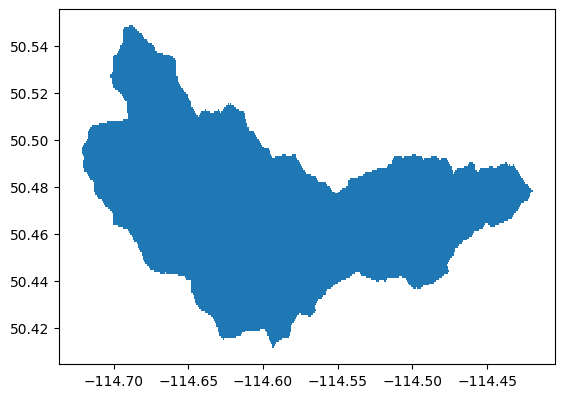

In [5]:
COMID_05BL027.plot()

## MERIT-Basins layers

Upon **visual** inspection, only layers #71 have relvant sub-basins and river branches

In [6]:
# file names
cat_files = ['cat_pfaf_71_MERIT_Hydro_v07_Basins_v01_bugfix1.shp']
riv_files = ['riv_pfaf_71_MERIT_Hydro_v07_Basins_v01_bugfix1.shp']
nca_files = ['hillslope_71_clean.shp']

# reading in data
cat = pd.concat([gpd.read_file(os.path.join(mb_path, f)) for f in cat_files])
riv = pd.concat([gpd.read_file(os.path.join(mb_path, f)) for f in riv_files])
nca = pd.concat([gpd.read_file(os.path.join(nc_path, f)) for f in nca_files])

In [7]:
cat.set_crs(epsg=4326, inplace=True)
nca.set_crs(epsg=4326, inplace=True)
riv.set_crs(epsg=4326, inplace=True)

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry
0,71000001,7.020492,4.158236,1.688334,0.000570,391.901537,2,0.0,0.000000,71000065,2,71000095,71000213,0,0,"LINESTRING (-98.06167 60, -98.0625 59.99917, -..."
1,71000002,24.171249,15.709184,1.538670,0.000058,701.754912,2,1.4,0.000058,71000065,2,71000003,71000014,0,0,"LINESTRING (-98.06167 60, -98.06083 60.00083, ..."
2,71000003,14.760464,11.209022,1.316838,0.000770,480.760660,2,11.4,0.000770,71000002,2,71000004,71000011,0,0,"LINESTRING (-98.1725 60.13, -98.17333 60.12917..."
3,71000004,6.240078,4.631999,1.347168,0.000911,388.938962,2,5.7,0.000911,71000003,2,71000005,71000015,0,0,"LINESTRING (-98.335 60.07, -98.33583 60.07083,..."
4,71000005,4.462477,3.338111,1.336827,0.000670,328.557527,2,3.0,0.000670,71000004,2,71000006,71000012,0,0,"LINESTRING (-98.39917 60.09667, -98.4 60.09583..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48946,71048947,1.498642,1.192443,1.256782,0.000333,32.277067,1,0.5,0.000333,71048442,0,0,0,0,0,"LINESTRING (-96.79 45.95583, -96.79083 45.955,..."
48947,71048948,2.743329,1.941526,1.412975,0.001674,52.472792,1,4.6,0.001674,71048857,0,0,0,0,0,"LINESTRING (-96.905 45.955, -96.90583 45.955, ..."
48948,71048949,9.357690,5.642147,1.658534,0.000171,76.116685,1,1.6,0.000171,71048338,0,0,0,0,0,"LINESTRING (-97.72083 45.995, -97.72 45.99417,..."
48949,71048950,12.016268,9.919203,1.211415,0.001511,43.278839,1,18.2,0.001511,71048880,0,0,0,0,0,"LINESTRING (-96.25667 45.96417, -96.25583 45.9..."


# Preparing `cat`, `riv`, and `nca` objects for AB

## Preparing `catchments` and `rivers` from `MERIT-Basins`

In [8]:
#catchments = gm.prepare_cat(cat=cat, cat_col_id='COMID', cst=None)
catchments = gm.prepare_cat(cat=cat, cat_col_id='COMID', cst=nca, cst_col_mapper={'FID':'COMID'}, cst_col_id='COMID')

In [9]:
catchments.head(3)

,COMID,unitarea,geometry,hillslope
0,71000001,39.620826,"POLYGON ((-98.14542 60.06375, -98.13792 60.063...",0
1,71000002,99.276774,"MULTIPOLYGON (((-98.11958 60.19292, -98.11458 ...",0
2,71000003,63.957629,"MULTIPOLYGON (((-98.33375 60.03542, -98.33292 ...",0


In [10]:
#use for MERIT-Basins
rivers = gm.prepare_riv(riv=riv, riv_cols={'id':'COMID', 'next_id':'NextDownID', 'slope':'slope', 'length':'lengthkm', 'length_direct':'lengthdir'}, cat=catchments, cat_cols={'id':'COMID', 'hillslope':'hillslope', 'geom':'geometry'})


In [11]:
rivers.head(3)

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry,hillslope
0,71000001,7.020492,4.158236,1.688334,0.000570,391.901537,2,0.0,0.000000,71000065,2,71000095,71000213,0,0,"LINESTRING (-98.06167 60, -98.0625 59.99917, -...",0
1,71000002,24.171249,15.709184,1.538670,0.000058,701.754912,2,1.4,0.000058,71000065,2,71000003,71000014,0,0,"LINESTRING (-98.06167 60, -98.06083 60.00083, ...",0
2,71000003,14.760464,11.209022,1.316838,0.000770,480.760660,2,11.4,0.000770,71000002,2,71000004,71000011,0,0,"LINESTRING (-98.1725 60.13, -98.17333 60.12917...",0


## Subsetting AB COMID 71037856 (station 05BL027) portion

In [12]:
#use for MERIT-Basins
basins, rivers = gm.intersect_topology(cat=catchments, cat_cols={'id':'COMID'}, riv=rivers, riv_cols={'id':'COMID','next_id':'NextDownID'}, outlet_id=[71037856])


In [13]:
# paths to save data

try:
    os.mkdir(os.path.expanduser('~/projects/COMID_71037856'))
    os.mkdir(os.path.expanduser('~/projects/COMID_71037856/0-geofabric'))

except:
    pass


In [14]:
# saving data
basins.to_file(os.path.expanduser('~/projects/COMID_71037856/0-geofabric/') + 'basins.shp')
rivers.to_file(os.path.expanduser('~/projects/COMID_71037856/0-geofabric/') + 'rivers.shp')
